<a href="https://colab.research.google.com/github/spdr-lily/Descomplica-Data-Science/blob/main/regressao_linear_multipla_imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear Múltipla:
No mercado imobiliário, o preço de um imóvel é influenciado por diversos fatores, com dados hipotéticos, esse modelo calcula o aumento no preço esperado para cada metro quadrado adicional e o aumento no preço esperado para cada quarto adicional, mantendo as outras variáveis constantes.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# criando e carregando os dados
# Dados simulados
data = {
    'Tamanho': [60, 80, 100, 70, 90, 120, 55, 75],
    'Quartos': [2, 3, 3, 2, 4, 4, 2, 3],
    'Banheiros': [1, 2, 2, 1, 2, 3, 1, 2],
    'Localizacao': [1, 2, 2, 1, 3, 3, 1, 2], # 1: Boa, 2: Média, 3: Excelente (variável categórica convertida para numérica)
    'Idade': [10, 5, 15, 8, 2, 7, 20, 12],
    'Preco': [150000, 220000, 280000, 180000, 350000, 400000, 130000, 200000]
}

df = pd.DataFrame(data)

# Definindo as variáveis independentes (X) e a variável dependente (y)
X = df[['Tamanho', 'Quartos', 'Banheiros', 'Localizacao', 'Idade']]
y = df['Preco']

In [3]:
# dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# criando e treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
# previsões com o modelo treinado
y_pred = model.predict(X_test)

In [6]:
# avaliando desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

Erro Quadrático Médio (MSE): 1268170116.38
Coeficiente de Determinação (R²): 0.84


In [7]:
# interpretando coeficientes
print('\nCoeficientes:')
for i, col in enumerate(X.columns):
    print(f'{col}: {model.coef_[i]:.2f}')
print(f'Intercepto: {model.intercept_:.2f}')


Coeficientes:
Tamanho: 3198.73
Quartos: 49678.43
Banheiros: -95132.17
Localizacao: 49678.43
Idade: -230.12
Intercepto: -94909.72


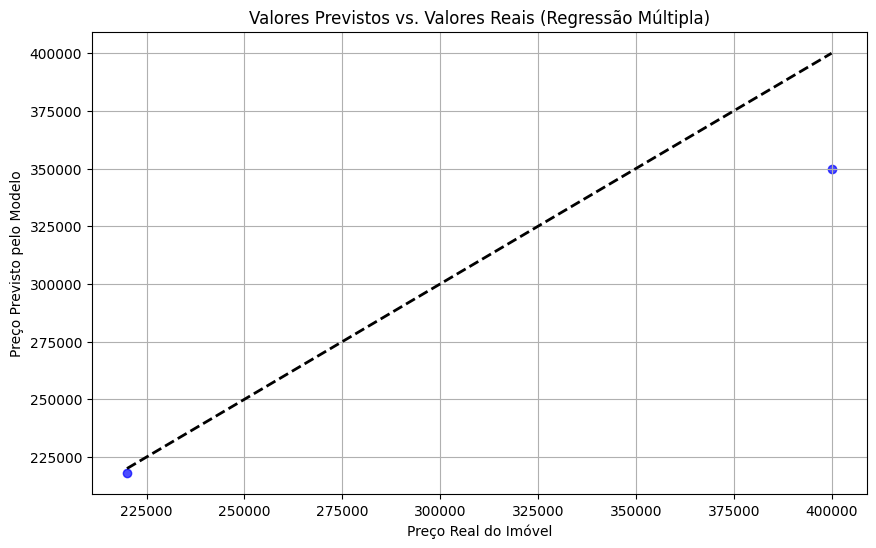

In [8]:
# gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotar os valores reais
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)

# Adicionar uma linha de referência onde a previsão seria perfeita (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Adicionar rótulos e título
plt.xlabel('Preço Real do Imóvel')
plt.ylabel('Preço Previsto pelo Modelo')
plt.title('Valores Previstos vs. Valores Reais (Regressão Múltipla)')
plt.grid(True)
plt.show()